# 5310: Methods in Empirical Analysis In class Exercise # 2.2
# Exploratory data analysis in Python.

# Advanced Data Analysis using Python

[Matthew McKay](https://github.com/mmcky)

In this notebook we demonstrate a few of the ``Python`` ecosystem tools that enable **research** in areas that can be difficult to do using traditional tools such as ``Stata`` that are typically fit-for-purpose tools.

The agility of a full programming language environment allows for a high degree of flexibility and the Python ecosystem provides a vast toolkit to remain productive.

## Table of Contents

1. The Product Space Network (Hidalgo, 2007)
2. Quick introduction to Networks and Graphs
3. Replicate Product Space Proximity Measure
    - Compute Revealed Comparative Advantage and $M_{cp}$ matrices [**Tools: Pandas**] (786 Products, 200+ Countries, and 53 Years)
    - Compute Proximity Matrices ($\phi_{pp'}$) and make this code run fast [**Tools: Pandas, Numpy, Numba, Dask**]
    - (Extension) Building Networks and Plotting Product Space Network Diagrams - albiet not as fancy [**Tools: NetworkX**]


#### Atlas of Complexity Product Space Map

![Product Space](./img/atlas_productspace.png)

#### Some Initial Observations

**Oil (3330)**, has a large world export share, but is not strongly co-exported (i.e. connected in the network) with any other products (other than LNG).

**Machinery, Electronics, Garments** are all sectors that have a high degree of co-export potential with other related products and form part of a densely connected core of the network.

**Developing Economies** typically occupy products in the **weakly connected periphery** of the network and **new products** tend to emerge close to exisiting products in the network. (established from analysis using the Product Space network). Middle Income Countries manage to diffuse into the densely connected core of the product space

![Thailand Product Space](./img/thailand-productspace.png)

--------------

## Network Analysis

Interest in studying networks is increasing within **Economics** with recent publications building network type features into their models, or using network analysis to uncover structural features of data that may otherwise go unexplored.


## What is a Network (Graph)?

Many people who have interacted with tools from network analysis have done so via the idea of Social Network Analysis (SNA).

    A Graph is a way of specifying relationships among a collection of items

They consist of a collection of **nodes** (or vertices) that are joined together by **edges**.



In [156]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

C:\Users\singa\AppData\Local\Temp\ipykernel_19140\853172885.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [157]:
g = nx.Graph()

In [158]:
g.add_nodes_from(["A", "B", "C", "D"])

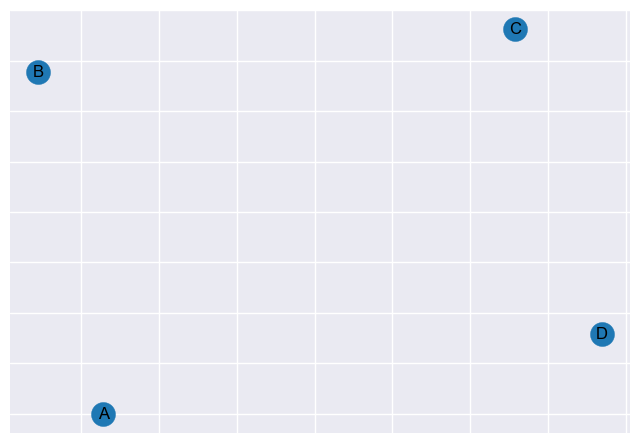

In [159]:
nx.draw_networkx(g)
plt.show()

 **Q1Add An Edge Between node 'A' and 'D'(10 points)**

In [160]:
g.add_edge("A", "B")   #Add Edge between Nodes A and B
g.add_edge("A", "C")   #Add Edge between Nodes A and C


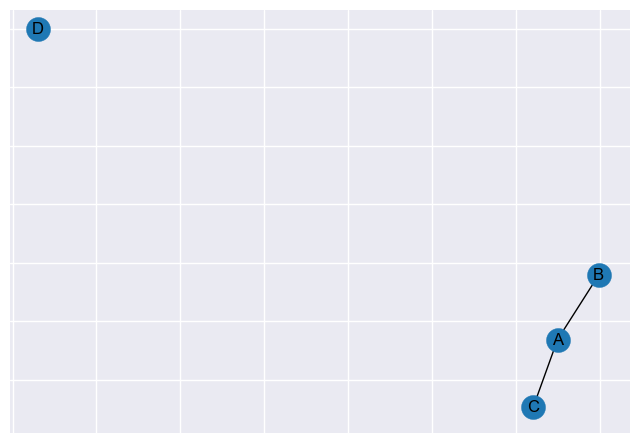

In [161]:
nx.draw_networkx(g)
plt.show()

#### You can use network metrics to learn more about the structure. What is the most central node?

In [162]:
nx.degree_centrality(g)

{'A': 0.6666666666666666,
 'B': 0.3333333333333333,
 'C': 0.3333333333333333,
 'D': 0.0}

In [163]:
g.add_edge("C","D")

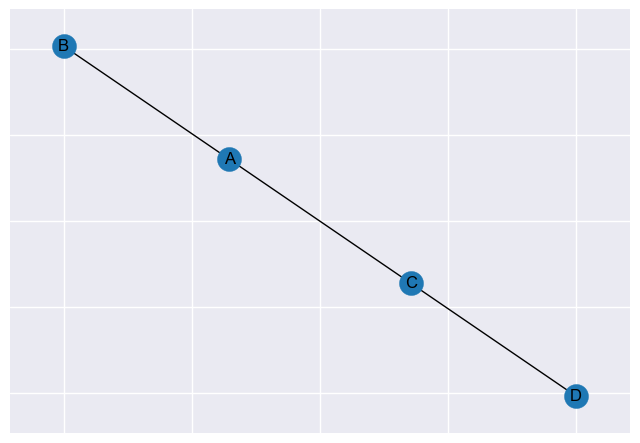

In [164]:
nx.draw_networkx(g)
plt.show()

In [165]:
nx.degree_centrality(g)

{'A': 0.6666666666666666,
 'B': 0.3333333333333333,
 'C': 0.6666666666666666,
 'D': 0.3333333333333333}

## What can we learn from Networks?

### Social Network Example: Karate Club (Zachary, 1977)

One early example of Social Network Analysis was conducted by Zachary (1977) who set out to use network analysis to explain factional dynamics and to understand **fission in small groups.** A network of **friendship** was used to understand and identify how this Karate group eventually split due to an initial conflict between two members.

- **Nodes:** Individuals
- **Edges:** Connections were added between two individuals if they were consistently observed to interact outside the normal activities of the club.

![Karate 1](./img/karate-club-1-combined.png)

#### We can learn things by considering the structure of these networks

The structure of these relationships can be exploited to uncover new insights into the data:

1. Communities (through Clustering)
1. Identification of main actors in Social Networks (Centrality Metrics)
1. Identifying indirect relationships through shortest / longest paths
1. Diffusion characteristics on temporal networks (such as disease transmission modeling)
1. ... + many other applications across many different sciences

One visualization (Cao, 2013) demonstrates how algorithmic analysis can reveal meaningful structure that clearly identifies roles played by certain individuals, that is based on observing simpler relational information on friendship between pairs of individuals.

![Karate 2](./img/karate-club-2.png)


------------------

## Replicating the Product Space Network using International Trade Data (Hidalgo, 2007)

Let's focus on an application of network analysis that is applied to international trade data to replicate some of the results contained in the Hidalgo (2007) paper and later in the [The Atlas of Complexity](http://atlas.cid.harvard.edu/) and [The Observatory of Economic Complexity](http://atlas.media.mit.edu/en/).

The Hidalgo (2007) paper is used as a **motivating example** to demonstrate various tools that are available in the ``Python`` ecosystem.

In this setting we want to looking at a characterisation of International Trade data by considering:
- **Nodes:** Products
- **Edges:** the likelihood of two products being co-exported

**Assumption:** If products are highly co-exported across countries, then the products are *revealed* to be more likely to share similar factors of production (or capabilities) required to produce them. For example, Shirts and Pants require a set of similar skills that lend themselves to be co-exported, while shirts and cars are much more dissimilar.

This relational information between products can be represented by a edge weights.

A **high value** means they have a **high likelihood of being co-exported**

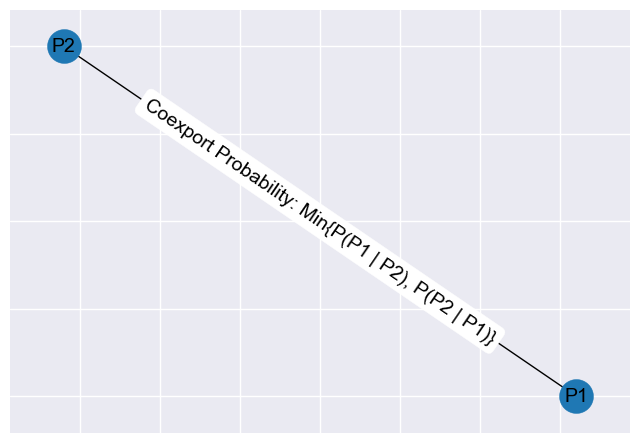

In [166]:
g = nx.Graph() # creates an empty undirected graph
g.add_edge("P1", "P2") #adds an edge between two nodes labeled "P1" and "P2" to the graph g
pos = nx.spring_layout(g) #This line calculates the positions of nodes in the graph using the "spring layout" algorithm provided by NetworkX. The positions are stored in the variable pos
nx.draw_networkx(g, pos=pos, node_size=600, font_size=14) #uses NetworkX and Matplotlib to draw the graph g using the positions specified in pos. It sets the node size to 600 and the font size for node labels to 14.
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels={("P1", "P2") : "Coexport Probability: Min{P(P1 | P2), P(P2 | P1)}"}, font_size=14) #adds an edge label to the edge between "P1" and "P2," specifying the coexport probability as described in the provided string. The font_size parameter sets the font size for the edge labels.
plt.show()

#### Let's work with a Toy Example with 8 products

In [167]:
adj = pd.read_csv("../Activty_2_2/../Activty_2_2/data/simple_productspace.csv", names=["P1", "P2", "weight"])
adj

,P1,P2,weight
0,Shirts,Pants,0.900
1,Shirts,Cars,0.050
2,Shirts,Cows,0.010
3,Shirts,Sugar,0.010
4,Pants,Cars,0.050
5,Oil,Sugar,0.010
6,Oil,Cars,0.005
7,Oil,Aircraft,0.005
8,Cars,Aircraft,0.500
9,Cars,Aircraft,0.500


In [168]:
g = nx.read_weighted_edgelist("../Activty_2_2/../Activty_2_2/data/simple_productspace.csv", delimiter=",")

In [169]:
g.nodes()

NodeView(('Shirts', 'Pants', 'Cars', 'Cows', 'Sugar', 'Oil', 'Aircraft', 'Wheat'))

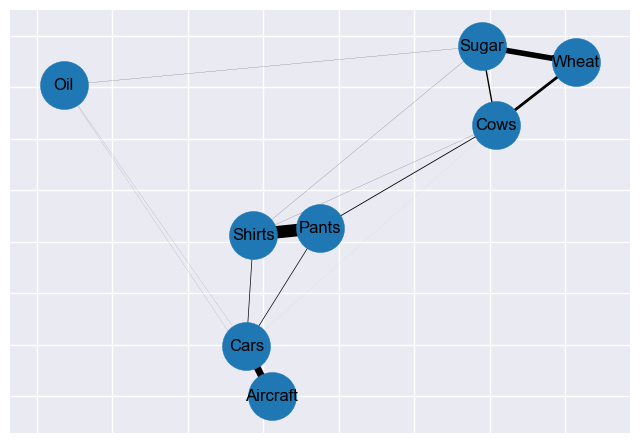

In [170]:
#Visualize the Network
pos = nx.spring_layout(g)
weights = [g[u][v]['weight']*10 for u,v in g.edges()]
nx.draw_networkx(g, node_size=1200, pos=pos, width=weights)
plt.show()

### Scale Up to Full set of Products (SITC R2 L4)

We now want to compute the edge weights to explore the full product space network derived from product level international trade data by computing the proximity matrix:

$$
\phi_{ij} = \min \{ P(RCA_i >= 1 \hspace{0.25cm}| \hspace{0.25cm} RCA_j >= 1), P(RCA_j >= 1 \hspace{0.25cm} | \hspace{0.25cm} RCA_i >= 1) \}
$$

**Proximity:** A **high** proximity value suggests any two products are exported by a similar set of countries.

The **tasks** involve:

1. Compute Revealed Comparative Advantage and $M_{cp}$ matrices [**Tools: Pandas**]
1. Compute Proximity Matrices ($\phi_{pp'}$) and make this code run fast [**Tools: Pandas, Numpy, Numba, Dask**]
1. Building Networks and Plotting Product Space Network Diagrams - *albiet not as fancy* [**Tools: NetworkX**]

## Data

International Trade Data is largely available in SITC and HS product classification systems.

In this notebook we will focus on SITC revision 2 Level 4 data with ``786`` defined products.

|Classification | Level | Products |
|---------------|-------|----------|
|SITC           | 4     | 786      |
|HS             | 6     | 5016     |

**Note:**

We use ``SITC`` data in this seminar, but as you can see performance of code becomes even more important when working with fully disaggregated ``HS`` international trade data

In [171]:
fl = "../Activty_2_2/data/year_origin_sitc_rev2.csv"
data = pd.read_csv(fl, converters={'sitc':str})   #Import SITC codes as strings to preserve formatting

In [172]:
data.head()

,year,origin,sitc,export
0,1962,AFG,0230,4000.0
1,1962,AFG,0250,66000.0
2,1962,AFG,0540,74000.0
3,1962,AFG,0545,17000.0
4,1962,AFG,0548,33000.0


**Question 2: What years are available in this dataset?

Hint:There is a method named ``unique()``, so you should get the array of years and then call ``.unique()``(10 Points)**

In [173]:
# Get the unique years from the "year" column
available_years = data['year'].unique()

# Print the available years
print(available_years)



[1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014]


**Question 3: How many non-zero trade flow values are in this dataset? (10 Points)**

In [174]:
import pandas as pd

# Load the dataset using the provided file path
fl = "../Activty_2_2/data/year_origin_sitc_rev2.csv"
data = pd.read_csv(fl, converters={'sitc': str})

# List all column names
column_names = data.columns
print("Column Names:")
print(column_names)

# Identify the correct column name for trade flow values
trade_flow_column_name = 'export'

# Count the number of non-zero trade flow values
non_zero_count = (data[trade_flow_column_name] != 0).sum()

# Print the count
print("Number of non-zero trade flow values:", non_zero_count)


Column Names:
Index(['year', 'origin', 'sitc', 'export'], dtype='object')
Number of non-zero trade flow values: 3779907


**Question 4: What countries are available in this dataset?(10 Points)**

In [175]:
# Get unique country names from the 'origin' column
countries = data['origin'].unique()

# Print the list of countries
print("Countries available in this dataset:")
for country in countries:
    print(country)



Countries available in this dataset:
AFG
AGO
ALB
ARE
ARG
AUS
AUT
BDI
BEL
BEN
BFA
BGR
BHR
BHS
BLZ
BMU
BOL
BRA
BRB
CAF
CAN
CHE
CHL
CHN
CIV
CMR
COD
COG
COL
CRI
CSK
CUB
CYP
DDR
DEU
DJI
DNK
DOM
DZA
ECU
EGY
ESP
ETH
FDR
FIN
FIO
FJI
FRA
GAB
GBR
GHA
GIB
GIN
GLP
GMB
GNB
GNQ
GRC
GTM
GUF
GUY
HKG
HND
HTI
HUN
IDN
IND
IRL
IRN
IRQ
ISL
ISR
ITA
JAM
JOR
JPN
KEN
KHM
KIR
KOR
KWT
LAO
LBN
LBR
LBY
LKA
MAC
MAR
MDG
MEX
MLI
MLT
MMR
MNG
MOZ
MRT
MUS
MYS
NCL
NER
NGA
NIC
NLD
NOR
NPL
NZL
OMN
PAK
PAN
PER
PHL
PNG
POL
PRK
PRT
PRY
QAT
ROU
SAU
SDN
SEN
SGP
SLE
SLV
SOM
SPM
SUN
SUR
SWE
SYR
TCD
TGO
THA
TTO
TUN
TUR
TWN
TZA
UGA
URY
USA
VEN
VNM
WSM
YAR
YMD
YUG
ZAF
ZMB
MWI
RWA
ZWE
GRL
SYC
FLK
SHN
BGD
AIA
AND
ANT
ATG
BRN
BTN
CCK
COK
COM
CPV
CXR
CYM
DMA
ESH
FRO
GRD
IOT
KNA
LCA
MDV
MSR
MTQ
NFK
NIU
NRU
PCI
PCN
PYF
REU
SLB
STP
TCA
TKL
TLS
TON
TUV
VCT
VGB
VUT
WLF
YEM
ATF
ABW
ARM
AZE
BIH
BLR
EST
FSM
GEO
HRV
KAZ
KGZ
LTU
LVA
MDA
MHL
MNP
PLW
RUS
SCG
SVN
TJK
TKM
UKR
UMI
UZB
CZE
ERI
MKD
SVK
LUX
ASM
ATA
BVT
BWA
GUM
HMD
LSO
MYT
NAM
PSE
SGS
SMR

In [176]:
data[(data['year'] == 2000)&(data['origin']=="AUS")].head()

,year,origin,sitc,export
2213361,2000,AUS,0011,260132101.0
2213362,2000,AUS,0012,167611315.0
2213363,2000,AUS,0013,280098.0
2213364,2000,AUS,0014,548603.0
2213365,2000,AUS,0015,134571371.0


In [177]:
data[data['origin'] == 'AUS'].set_index(["year","sitc"])["export"].unstack(level="year").head()

year,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
sitc,,,,,,,,,,,,,,,,,,,,,
0010,NaN,NaN,NaN,1000.0,NaN,NaN,NaN,1000.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0011,1286000.0,675000.0,1177000.0,1700000.0,748000.0,548000.0,586000.0,747000.0,331000.0,443000.0,...,283381176.0,284544151.0,365401097.0,571444736.0,586230117.0,793934945.0,650001457.0,627274883.0,728998394.0,1.114734e+09
0012,2600000.0,3619000.0,5593000.0,3560000.0,4725000.0,5078000.0,5578000.0,6828000.0,11517000.0,13321000.0,...,211748259.0,215548475.0,216467212.0,307677017.0,296862273.0,319842757.0,347639153.0,296233596.0,174194459.0,2.209887e+08
0013,26000.0,52000.0,81000.0,69000.0,60000.0,32000.0,99000.0,108000.0,108000.0,189000.0,...,260620.0,309274.0,549802.0,153458.0,37764.0,224888.0,NaN,NaN,345256.0,2.302240e+05
0014,375000.0,398000.0,445000.0,187000.0,83000.0,73000.0,30000.0,83000.0,263000.0,258000.0,...,592790.0,2842029.0,3599939.0,4708910.0,6542608.0,5466152.0,5372783.0,4237839.0,1165708.0,3.056300e+05


---------------

## Computing Revealed Comparative Advantage

The literature uses the standard Balassa definition for Revealed Comparative Advantage

$$
\large
RCA_{cpt} = \frac{\frac{E_{cpt}}{E_{ct}}}{\frac{E_{pt}}{E_t}}
$$

where,

1. $E_{cpt}$ are exports from country $c$ in product $p$ at time $t$
1. $E_{ct}$ are total country $c$ exports at time $t$
1. $E_{pt}$ are total product $p$ exports at time $t$
1. $E_{t}$ are total world exports at time $t$

**Reference:** Balassa, B. (1965), Trade Liberalisation and Revealed Comparative Advantage, The Manchester School, 33, 99-123.

To compute **RCA** we need to aggregate data at difference levels to obtain each component of the fraction defined above.

Let's break the equation down to figure out what needs to be computed:

$$
\large
E_{ct} = \sum_{p}{E_{cpt}}
$$

In [178]:
cntry_export = data[["year", "origin", "export"]].groupby(by=["year", "origin"]).sum()
cntry_export.head(n=2)

export
year origin             
1962 AFG      86135000.0
     AGO     119458000.0

This gives us a ``pandas.DataFrame`` that is indexed by a multi-index object. This can be very useful but we would like to use this data in the original data table for each product exported at time t by each country. We could use this new object and:

1. ``merge`` the data back into the original data DataFrame
2. use ``transform`` to request an object that is of the same shape as the original data DataFrame.

In [179]:
import pandas as pd
import numpy as np

data["cntry_export"] = data[["year", "origin", "export"]].groupby(by=["year", "origin"]).transform(np.sum)
data["prod_export"] = data[["year", "sitc", "export"]].groupby(by=["year", "sitc"]).transform(np.sum)
data["world_export"] = data[["year", "export"]].groupby(by=["year"]).transform(np.sum)


**Question 2: What years are available in this dataset?

Hint:There is a method named ``unique()``, so you should get the array of years and then call ``.unique()``(10 Points)**

Now that the components of the equation have been computed we can now simply calculate $RCA$ as expressed by the original fraction

In [180]:
data["rca"] = (data["export"] / data["cntry_export"]) / (data["prod_export"] / data["world_export"])

In [181]:
data.head()

,year,origin,sitc,export,cntry_export,prod_export,world_export,rca
0,1962,AFG,0230,4000.0,86135000.0,438581000.0,1.428420e+11,0.015125
1,1962,AFG,0250,66000.0,86135000.0,261448000.0,1.428420e+11,0.418634
2,1962,AFG,0540,74000.0,86135000.0,48924000.0,1.428420e+11,2.508338
3,1962,AFG,0545,17000.0,86135000.0,349188000.0,1.428420e+11,0.080736
4,1962,AFG,0548,33000.0,86135000.0,85126000.0,1.428420e+11,0.642877


---------------__
## Computing $M_{cp}$ Matrix: Who Exports What Products and When?

$RCA >= 1$ is where country $c$ has a revealed comparative advantage in product $p$ at time $t$

Therefore we can define the matrix $M_{cp}$:

$$
M_{cp} =
\begin{cases}
  1 \text{ if  }RCA \ge 1\\    
  0 \text{ if  }RCA \lt 1   
\end{cases}
$$

We can first construct $RCA$ matrices and then compute $M_{cp}$ using a conditional map


In [182]:
#-Generate Yearly RCA Mcp Matrices and store them in a Dictionary-#
rca = {}
for year in data.year.unique():
    yr = data[data.year == year].set_index(['origin', 'sitc']).unstack('sitc')['rca']
    rca[year] = yr

In [183]:
rca[2000].head()

sitc,0011,0012,0013,0014,0015,0111,0112,0113,0114,0115,...,8994,8996,8997,8998,8999,9310,9410,9510,9610,9710
origin,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,0.000189,NaN,0.008223,NaN,NaN,...,NaN,0.009006,0.000910,0.006053,0.001468,1.264113,0.104766,NaN,NaN,0.76756
AFG,NaN,NaN,NaN,NaN,NaN,0.176481,0.066896,NaN,NaN,NaN,...,NaN,0.067773,0.782384,NaN,NaN,0.066374,NaN,NaN,NaN,NaN
AGO,NaN,NaN,0.000012,NaN,NaN,0.001756,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000137,NaN,0.026715,NaN,NaN,0.005944,NaN
AIA,NaN,NaN,NaN,NaN,NaN,15.716737,6.270237,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.649915,6.906314,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006836,NaN,...,0.304894,0.014938,0.146457,0.093441,NaN,0.357895,25.006762,NaN,3.426721,NaN


### Question 6: How can we use ``rca`` to compute the ``mcp`` matrix?

In [184]:
#-Generate Yearly Binary Mcp Matrices-#
mcp = {}
for year in rca.keys():
    mcp[year] = rca[year].fillna(0.0).applymap(lambda x: 1 if x >= 1.0 else 0.0)

<button data-toggle="collapse" data-target="#sol7" class='btn btn-primary'>Solution</button>
<div id="sol7" class="collapse">
```python
#-Generate Yearly Binary Mcp Matrices-#
mcp = {}
for year in rca.keys():
    mcp[year] = rca[year].fillna(0.0).applymap(lambda x: 1 if x >= 1.0 else 0.0)
```

### Question: What is the key assumption implied by the above code?

In [185]:
mcp[2000].head()

sitc,0011,0012,0013,0014,0015,0111,0112,0113,0114,0115,...,8994,8996,8997,8998,8999,9310,9410,9510,9610,9710
origin,,,,,,,,,,,,,,,,,,,,,
ABW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AGO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIA,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Question 6: What products did Australia ("AUS") export with RCA in 1998?

In [186]:
# Filter rows for Australia in 1998
aus_1998 = data[(data['origin'] == 'AUS') & (data['year'] == 1998)].copy()  # Create a copy to avoid SettingWithCopyWarning

# Calculate RCA for each product
aus_1998['RCA'] = aus_1998.groupby('sitc')['export'].transform('sum') / aus_1998['export']

# Filter products with RCA > 1
exported_products = aus_1998[aus_1998['RCA'] > 1]

# List the exported products
exported_product_list = exported_products['sitc'].unique()

# Print the list of exported products
print("Products exported by Australia with RCA in 1998:")
for product in exported_product_list:
    print(product)


Products exported by Australia with RCA in 1998:


<button data-toggle="collapse" data-target="#sol8" class='btn btn-primary'>Solution</button>
<div id="sol8" class="collapse">
```python
products = mcp[1998].loc['AUS']
products[products == 1.0]
```

--------------

## Computing Proximity Matrix $\phi_{ij}$

**Proximity:** A **high** proximity value suggests any two products are exported by a similar set of countries.

$$
\phi_{ij} = \min \{ P(RCA_i >=1 \hspace{0.25cm} | \hspace{0.25cm} RCA_j >= 1), P(RCA_j >= 1 \hspace{0.25cm} | \hspace{0.25cm} RCA_i >= 1) \}
$$

The minimum **conditional probability of coexport** can be computed:

$$
\phi_{ij} = \frac{\sum_c \{ M_{cp_i} * M_{cp_j} \}}{max \{k_{p_i}, k_{p_j}\}}
$$

where,

1. $k_{p_i}$ is the ubiquity of product $i$ (i.e. the number of countries that export product $i$)
2. $k_{p_j}$ is the ubiquity of product $j$ (i.e. the number of countries that export product $j$)
2. $M_{cp_i}$ is the column vector in $M_{cp}$ matrix for product $i$
3. $M_{cp_j}$ is the column vector in $M_{cp}$ matrix for product $j$
4. $\sum_c \{ M_{cp_i} * M_{cp_j} \}$ is the number of countries that export both product $i$ and product $j$

The $\phi_{ij}$ matrix is therefore computed through all pairwise combinations of column vectors which is computationally intensive.

### Step 1: Compute Proximity Matrix using Pandas

In [187]:
def proximity_matrix_pandas(mcp, fillna=True):
    products = sorted(list(mcp.columns))
    sum_products = mcp.sum(axis=0)
    proximity = pd.DataFrame(index=products, columns=products)
    for i, product1 in enumerate(products):
        for j, product2 in enumerate(products):
            if j > i:  #Symmetric Matrix Condition
                continue
            numerator = (mcp[product1] * mcp[product2]).sum()
            denominator = max(sum_products[product1], sum_products[product2])
            if denominator == 0:
                cond_prob =  np.nan
            else:
                cond_prob = numerator / denominator
            proximity.set_value(index=product1, col=product2, value=cond_prob)
            proximity.set_value(index=product2, col=product1, value=cond_prob)
    if fillna:
        proximity = proximity.fillna(0.0)
    return proximity

In [188]:
%%time
prox_2000 = proximity_matrix_pandas(mcp[2000])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\singa\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "C:\Users\singa\AppData\Local\Temp\ipykernel_19140\1774519119.py", line 15, in proximity_matrix_pandas
    proximity.set_value(index=product1, col=product2, value=cond_prob)
    ^^^^^^^^^^^^^^^^^^^
  File "c:\Users\singa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'set_value'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\singa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.struc

#### Check the Data (simple stats and visualizations)

Hidalgo (2007) suggests that 32% of values are < 0.1 and 65% of values are < 0.2

## But Wait - Problem!

at **~1 minute** this is taking a reasonably long time to compute for one year.  This makes working with this data in an agile way problematic and computing for 50 years would take an hour to compute. While this was easy to implement, it isn't very fast!

Let's **profile** this code to get an understanding where we spend most of our time

For this line to run you will need to install ``line_profiler`` by running:

```bash
conda install line_profiler
```

In [189]:
# !conda install line_profiler

In [190]:
%lprun -f function_name code_to_profile()


UsageError: Line magic function `%lprun` not found.


In [191]:
# %lprun -f proximity_matrix_pandas proximity_matrix_pandas(mcp[2000])

--------------

## Step 2: Consider other Python Tools (NumPy)

Most of the time you will want to conduct **numerical** type computing in NumPy.

The code actually looks pretty similar - the main difference is conducting operations on pure numpy arrays

In [192]:
def proximity_matrix_numpy(mcp, fillna=False):
    products = sorted(list(mcp.columns))
    num_products = len(products)
    proximity = np.empty((num_products, num_products))
    col_sums = mcp.sum().values
    data = mcp.T.as_matrix()                  #This generates a c x p numpy array
    for index1 in range(0,num_products):
        for index2 in range(0,num_products):
            if index2 > index1:
                continue
            numerator = (data[index1] * data[index2]).sum()
            denominator = max(col_sums[index1], col_sums[index2])
            if denominator == 0.0:
                cond_prob = np.nan
            else:
                cond_prob = numerator / denominator
            proximity[index1][index2] = cond_prob
            proximity[index2][index1] = cond_prob
    # Return DataFrame Representation #
    proximity = pd.DataFrame(proximity, index=products, columns=products)
    proximity.index.name = 'productcode1'
    proximity.columns.name = 'productcode2'
    if fillna:
        proximity = proximity.fillna(0.0)
    return proximity

In [193]:
%%time
prox_2000_numpy = proximity_matrix_numpy(mcp[2000])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\singa\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\execution.py", line 1340, in time
    exec(code, glob, local_ns)
  File "<timed exec>", line 1, in <module>
  File "C:\Users\singa\AppData\Local\Temp\ipykernel_19140\107860320.py", line 6, in proximity_matrix_numpy
    data = mcp.T.as_matrix()                  #This generates a c x p numpy array
           ^^^^^^^^^^^^^^^
  File "c:\Users\singa\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\generic.py", line 5989, in __getattr__
    return object.__getattribute__(self, name)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'DataFrame' object has no attribute 'as_matrix'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\singa\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.Interact

------------------------

## Step 3: Just in Time Compilation (Numba)

**Numba** is a package you can use to accelerate your code by using a technique called **just in time (or JIT)** compilation. It converts your high-level python code to low level llvm code to run it closer to the raw machine level.

``nopython=True`` ensures the ``jit`` compiles without any ``python`` objects. If it cannot achieve this it will throw an error.

**Numba** now supports a lot of the ``NumPy`` api and can be checked [here](http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html)

--------------------

## Using Dask to Compute all Years in Parallel

#### NOTE: THIS WON'T WORK ON DEMO DOCKER ENVIRONMENT

Now that we have a fast single year computation, we can compute all cross-sections serially using a loop.

Alternatively, we can parallelize these operations using ``Dask`` to delay computation and then ask the ``Dask`` scheduler to coordinate the computation over the number of **cores** available to you. This is particularly useful when using ``HS`` data.

**Note:** This simple approach to parallelization does have some overhead to coordinate the computations so you won't get a full 4 x speed up when using a 4-core machine.

In [194]:
import dask
from distributed import Client
Client()

c:\Users\singa\AppData\Local\Programs\Python\Python311\Lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 50740 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:50740/status,
Dashboard: http://127.0.0.1:50740/status,Workers: 4
Total threads: 4,Total memory: 7.91 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50743,Workers: 4
Dashboard: http://127.0.0.1:50740/status,Total threads: 4
Started: Just now,Total memory: 7.91 GiB
Comm: tcp://127.0.0.1:50771,Total threads: 1
Dashboard: http://127.0.0.1:50772/status,Memory: 1.98 GiB
Nanny: tcp://127.0.0.1:50746,


In [195]:
%%time
#-Compute the Results-#
result = dask.compute(*collection)

CPU times: total: 0 ns
Wall time: 0 ns


In [196]:
#-Organise the list of returned tuples into a convenient dictionary-#
results = {}
for year, df in result:
    results[year] = df

In [197]:
if "2000" in results:
    comparison = results["2000"].equals(prox_2000)
    if comparison:
        print("The computed proximity matrix for 2000 is equal to prox_2000.")
    else:
        print("The computed proximity matrix for 2000 is not equal to prox_2000.")
else:
    print("No computed proximity matrix found for the year 2000.")


No computed proximity matrix found for the year 2000.


**Note:** [Dask](https://github.com/dask/dask) does a lot more than this and is worth looking into for medium to large scale computations

In [198]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

--------------------------

## Performance Comparison (SITC and HS Data)

For **SITC** Data: (786 Products, 229 Countries, 52 Years)


| Function         | Time/Year        | Total Time  | Speedup |
|------------------|------------------|-------------|---------|
| pandas           | 220 seconds      | ~177 minutes| -       |
| pandas_symmetric | 104 seconds      | ~84 minutes | BASE       |
| numpy            | 2.5 seconds      | 120 seconds | ~41x    |
| numba            | 124 milliseconds | 6 seconds   | ~800x   |
| numba + dask     | N/A              | 5 seconds   | -       |



For **HS** Data: (5016 Products, 222 Countries, 20 Years)

| Function         | Time/Year                    | Total Time | Speedup |
|------------------|------------------------------|------------|---------|
| pandas           | 1 Hour 25 minutes |      -     | -       |
| pandas_symmetric | 43 minutes                   |      -     | BASE       |
| numpy            | 1 min 37 seconds             |      -     | ~28x    |
| numba            | 5 seconds                    | 1min 45 seconds   | ~516x   |
| numba + dask     | N/A                          | 45 seconds      |    -     |

These were run on the following **machine:**

| Item      | Details          |
|-----------|------------------|
| Processor | Xeon E5 @ 3.6Ghz |
| Cores     | 8                |
| RAM       | 32Gb RAM         |
| Python    | Python 3.6       |

## Visualizations

In [199]:
ps_nodes = pd.read_csv("data/PS_SITC_nodes", sep="\t", converters={'sitc' : str},
                       names=["sitc", "community", "x", "y", "nodesize","leamer","pname","ncolor"])
ps_edges = pd.read_csv("data/PS_SITC_edges", sep="\t", converters={'sourceid' : str, 'targetid' : str},
                       names=["sourceid", "sourcex", "sourcey","targetid","targetx","targety", "width","color"])

In [200]:
ps_nodes.head()

,sitc,community,x,y,nodesize,leamer,pname,ncolor
0,6932,999,4551.899658,2540.087158,48.780762,8,"WIRE,TWISTED HOOP FOR FENCING OF IRON OR STEEL",#9c9a87
1,7362,10,216.835098,5013.330811,65.180725,9,METAL FORMING MACHINE TOOLS,#4037ab
2,7911,10,538.914902,5650.589111,53.997589,9,"RAIL LOCOMOTIVES,ELECTRIC",#4037ab
3,8946,10,696.394257,5316.897949,57.695251,7,NON-MILITARY ARMS AND AMMUNITION THEREFOR,#4037ab
4,7264,10,57.284065,5879.528076,73.333267,9,PRINTING PRESSES,#4037ab


In [201]:
ps_nodes.shape

(774, 8)

In [202]:
def normalize(df, column):
    max_value = df[column].max()
    min_value = df[column].min()
    df[column+"_scaled"] = (df[column] - min_value) / (max_value - min_value)
    return df

In [203]:
#Preprocess Coordinates to be Normalized between 0,1
ps_nodes = normalize(ps_nodes, 'x')
ps_nodes = normalize(ps_nodes, 'y')

In [204]:
ps_nodes.head()

,sitc,community,x,y,nodesize,leamer,pname,ncolor,x_scaled,y_scaled
0,6932,999,4551.899658,2540.087158,48.780762,8,"WIRE,TWISTED HOOP FOR FENCING OF IRON OR STEEL",#9c9a87,0.831500,0.136279
1,7362,10,216.835098,5013.330811,65.180725,9,METAL FORMING MACHINE TOOLS,#4037ab,0.335160,0.632872
2,7911,10,538.914902,5650.589111,53.997589,9,"RAIL LOCOMOTIVES,ELECTRIC",#4037ab,0.372036,0.760825
3,8946,10,696.394257,5316.897949,57.695251,7,NON-MILITARY ARMS AND AMMUNITION THEREFOR,#4037ab,0.390066,0.693824
4,7264,10,57.284065,5879.528076,73.333267,9,PRINTING PRESSES,#4037ab,0.316892,0.806793


In [205]:
import numpy as np
#-Obtain Dictionary of Coordinates-#
coord = {}
xy = ps_nodes[["x_scaled","y_scaled"]].values
for idx, productcode in enumerate(ps_nodes["sitc"]):
   coord[productcode] = xy[idx]
#-Add Missing Nodes-#
coord['6784'] = np.array([0,0])

In [206]:
coord

{'6932': array([0.83150017, 0.13627893]),
 '7362': array([0.33515958, 0.63287213]),
 '7911': array([0.37203591, 0.76082481]),
 '8946': array([0.39006641, 0.69382423]),
 '7264': array([0.31689188, 0.80679259]),
 '2783': array([0.84413469, 0.13412067]),
 '7272': array([0.3825399 , 0.33982403]),
 '6851': array([0.85044558, 0.14882738]),
 '7411': array([0.30758091, 0.65328061]),
 '8812': array([0.29917587, 0.69796137]),
 '6421': array([0.759203  , 0.37490863]),
 '6793': array([0.55204451, 0.68659617]),
 '6514': array([0.74963088, 0.58886941]),
 '0620': array([0.76761188, 0.41850043]),
 '0488': array([0.68121005, 0.32931457]),
 '7842': array([0.50519799, 0.61806944]),
 '7861': array([0.66451891, 0.39075549]),
 '0224': array([0.68550201, 0.40946486]),
 '7428': array([0.32048991, 0.61346783]),
 '6624': array([0.79568112, 0.50407798]),
 '7649': array([0.18555615, 0.19227612]),
 '7788': array([0.195401  , 0.24316837]),
 '7239': array([0.51705402, 0.46546139]),
 '7267': array([0.32016046, 0.5657

In [207]:
#-Check Entry-#
ps_nodes[ps_nodes.sitc == "0011"]

,sitc,community,x,y,nodesize,leamer,pname,ncolor,x_scaled,y_scaled
491,0011,239,2847.516846,3320.90686,60.540527,5,"ANIMALS OF THE BOVINE SPECIES,INCL.BUFFALOES,LIVE",#9fb3bf,0.636358,0.293057


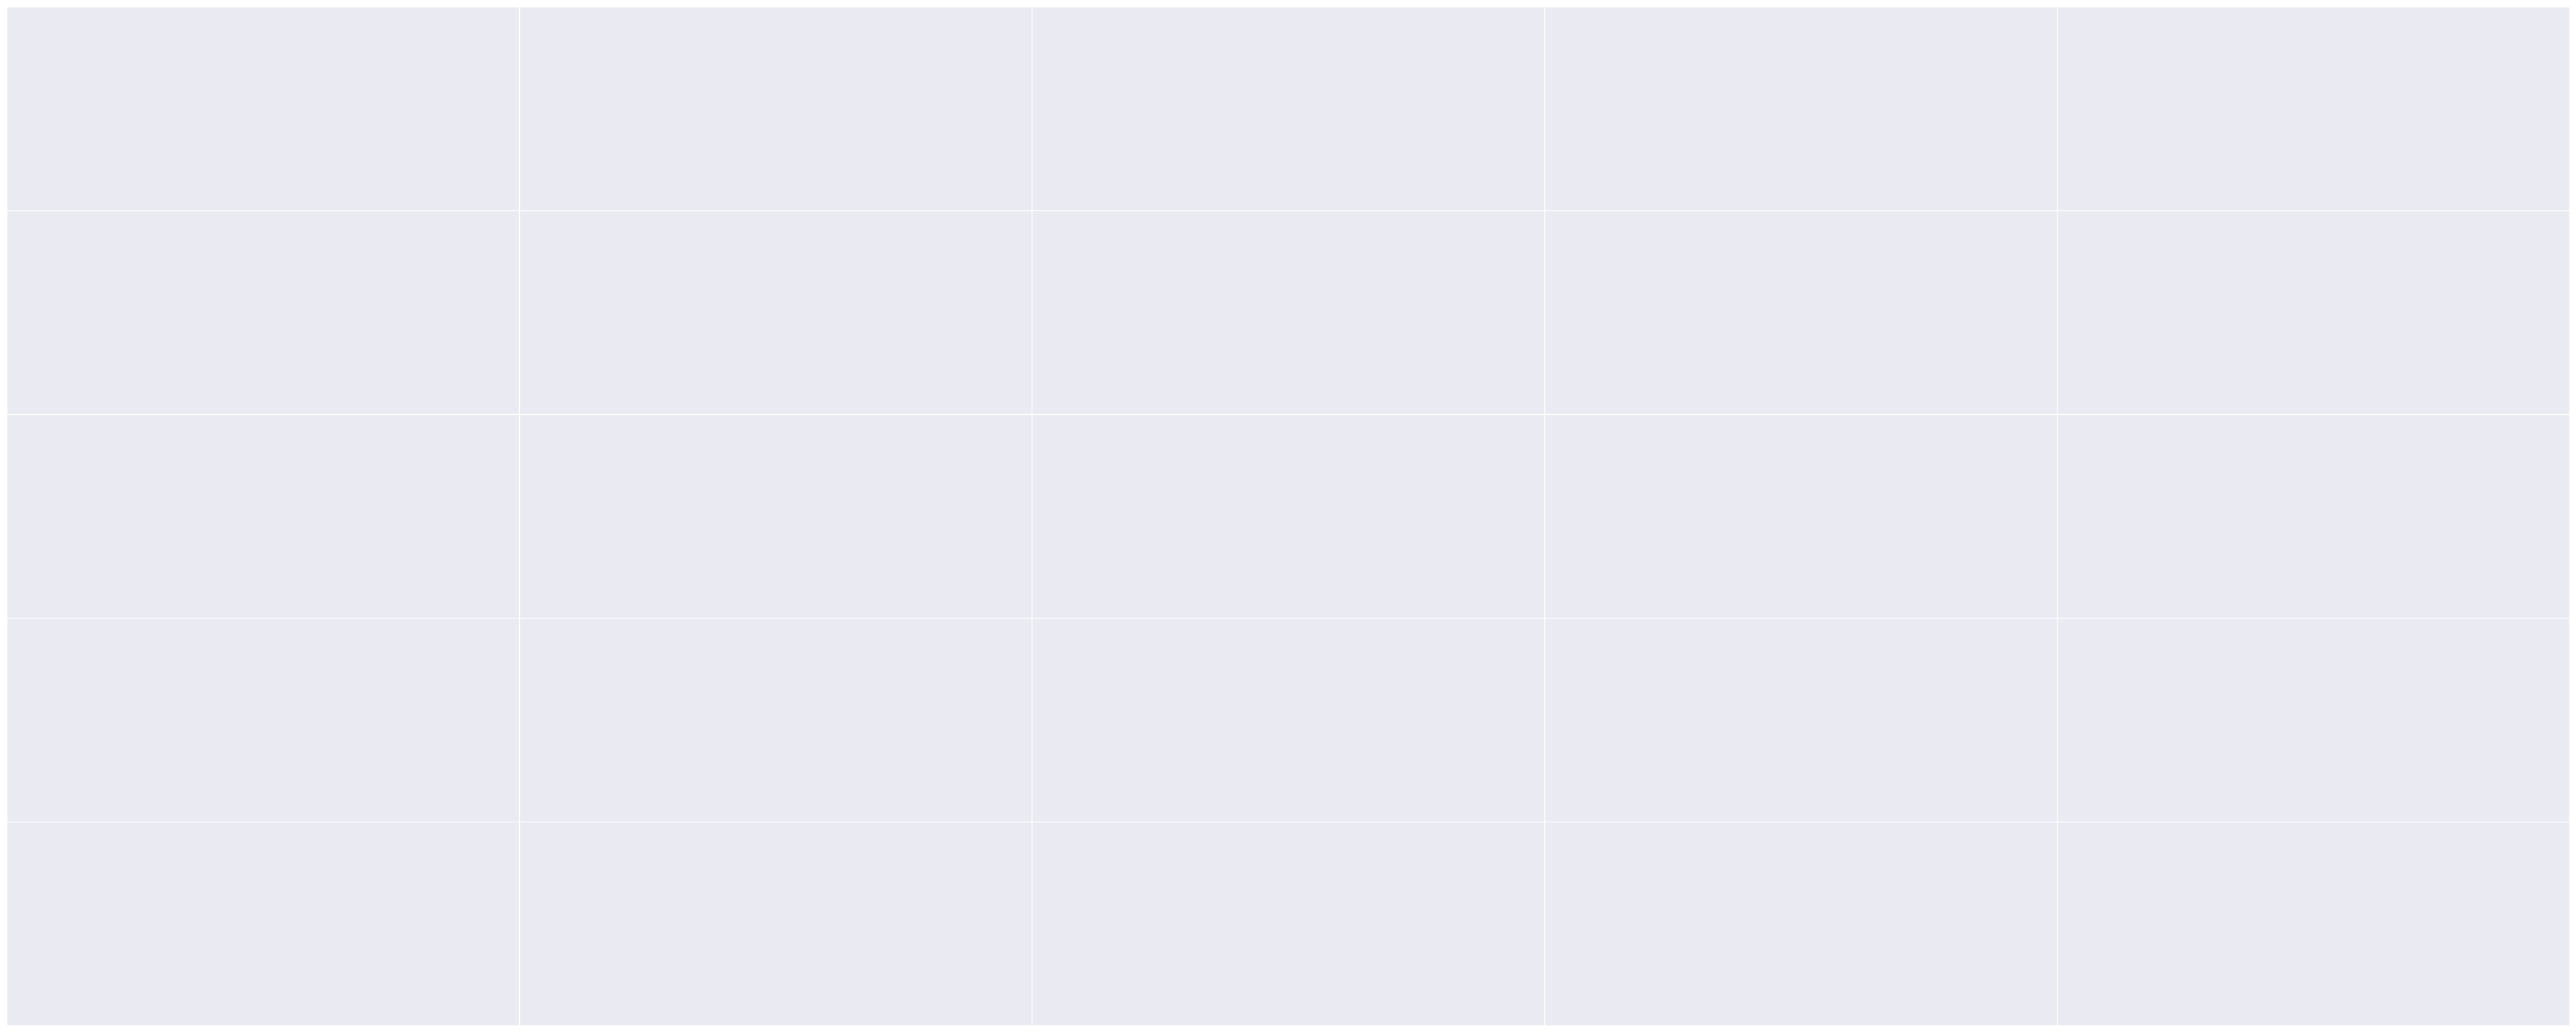

In [208]:
import matplotlib.pyplot as plt

# Assuming 'g' is your NetworkX graph and 'coord' contains node positions
fig = plt.figure(figsize=(50, 20))
ax = fig.gca()

# Filter nodes in 'g' to only include those with positions in 'coord'
valid_nodes = [node for node in g.nodes if node in coord]

# Draw the NetworkX graph with valid nodes
nx.draw_networkx(g.subgraph(valid_nodes), ax=ax, pos=coord, node_size=750, width=1)
plt.savefig("productspace1.png")


**Note:** File is saved Locally to view the network in greater detail

In [209]:
#-Let's See where Apparel Chapter 84 Nodes are Located-#
def choose_color(x):
    if x[:2] == "84":
        return "b"
    else:
        return "r"

nodes = pd.DataFrame(sorted(list(coord.keys())), columns=["nodeid"])
nodes["color"] = nodes["nodeid"].apply(lambda x: choose_color(x))

In [210]:
nodes[nodes.color == 'b'].head()

,nodeid,color
689,8421,b
690,8422,b
691,8423,b
692,8424,b
693,8429,b


In [211]:
#-Get the Order of Nodes the Same as Network Node List
order = pd.DataFrame(g.nodes()).reset_index()
order.columns = ["order", "nodeid"]
nodes = nodes.merge(order, how="inner", on="nodeid")
nodes = nodes.sort_values(by="order")


# References

[1] Zachary, W. (1977), "An Information Flow Model for Conflict and Fission in Small Groups", Journal of Anthropological Research, Vol. 33, No. 4 (Winter, 1977), pp. 452-473

[2] Cao, X., Wang X., Jin D., Cao Y. & He, D. (2013), "Identifying overlapping communities as well as hubs and outliers via nonnegative matrix factorization", Scientific Reports, Vol 3, Issue 2993

[3] Hidalgo, C.A., Klinger, B., Barabasi, A.-L., Hausmann, R. (2007), "The Product Space Conditions the Development of Nations", Science, Vol 317, pp 482-487

[4] Atlas of Complexity (http://atlas.cid.harvard.edu/)

[5] The Observatory of Economic Complexity (http://atlas.media.mit.edu/en/)

[6] Atlas of Complexity Gride Points for Nodes sourced from http://www.michelecoscia.com/?page_id=223

[7] Balassa, B. (1965), "Trade Liberalisation and Revealed Comparative Advantage", The Manchester School, 33, 99-123.